<h1><center>Car Price Portfolio Project</center></h1>

<div style="text-align: justify"> Cars are one of the transportation that people have. Some people buy cars for daily usage. Some people buy cars because they have good memories from the past. Some even bought a car to complete their collection.
It takes a lot of thought to buy a car, for example, the price. "What's the right price for a car?" To answer this question, I helped by building a machine-learning model that predicts a car's price. </div>

<h2><center>A. Data Profiling</center></h2>

__What’s data profiling?__
<br>
Data Profiling is summarizing data using descriptive statistics. Creating data profiling aims to have a strong understanding of data to compile framework analysis and visualize data.

<h3><center>A.1. Importing Library</center></h3>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.5
pandas version :  1.4.4
seaborn version :  0.11.2


<h3><center>A.2. Importing Data</center></h3>

In [2]:
df = pd.read_csv('CarPrice.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


The first step is initializing the library, importing the dataset into python using **Pandas**, and assigning it as **df**. The data will be saved as **‘CarPrice.csv’**.

<h3><center>A.3. Showing The Length of The Data</center></h3>

In [3]:
print("The Length of The Data: ", len(df))

The Length of The Data:  11914


The second step is to **display how much data on the dataset** using **len()**. The result is the size of this data is **11914**.

<h3><center>A.4. Showing The Shape of The Data</center></h3>

In [4]:
print("The Shape of The Data: ", df.shape)

The Shape of The Data:  (11914, 16)


The third step is to **display how many rows and columns in the data** use **.shape**. The result is this data has **11914 rows and 16 columns**.

<h3><center>A.5. Showing The Information of The Data</center></h3>

In [5]:
print("The Information of The Data: \n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

The fourth step is to **get information from the data about what kind of type for each column** using the **.info()**. As you can see, there are three types of data: **object, int64, and float64**.

<h3><center>A.6. Showing The Unique Data</center></h3>

In [6]:
print("The The Unique Data:\n", df.nunique())

The The Unique Data:
 Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64


The fifth step of data profiling is **displaying unique data from each column** using the function **.nunique()**.

<h3><center>A.7. Changing The Column's Name And Value</center></h3>

As shown in **Showing The Information of The Data**, the column's name on the dataset is ambiguous. For example, the MSRP column contains the price of a car. Therefore I'm going to change the column's title. For the column's value, I will change it into title().

In [7]:
df.rename(columns ={'MSRP': 'Price',
                    'Make': 'Car Brand',
                    'Engine HP': 'Engine Horse Power',
                    'Driven_Wheels':'Driven Mode',
                    'highway MPG':'KML-H',
                    'city mpg':'KML-C'}, inplace=True)

df['Engine Fuel Type'] = df['Engine Fuel Type'].str.title()
df['Transmission Type'] = df['Transmission Type'].str.title()
df['Driven Mode'] = df['Driven Mode'].str.title()
df['Vehicle Size'] = df['Vehicle Size'].str.title()
df['Vehicle Style'] = df['Vehicle Style'].str.title()

<h3><center>A.8. Showing The Statistical Calculations</center></h3>

In [8]:
nums = ['Engine Horse Power', 'Engine Cylinders', 'Number of Doors', 'KML-H', 'KML-C', 'Popularity', 'Price']
cats = ['Car Brand', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven Mode', 'Vehicle Size', 'Vehicle Style']

In [9]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Horse Power,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
KML-H,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
KML-C,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
Price,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [10]:
df[cats].describe().T

,count,unique,top,freq
Car Brand,11914,48,Chevrolet,1123
Model,11914,915,Silverado 1500,156
Engine Fuel Type,11911,10,Regular Unleaded,7172
Transmission Type,11914,5,Automatic,8266
Driven Mode,11914,4,Front Wheel Drive,4787
Vehicle Size,11914,3,Compact,4764
Vehicle Style,11914,16,Sedan,3048


<h3><center>A.8. Checking The Outliers</center></h3>

Outliers are extreme values that stand out significantly from the overall pattern of values in a dataset or graph.

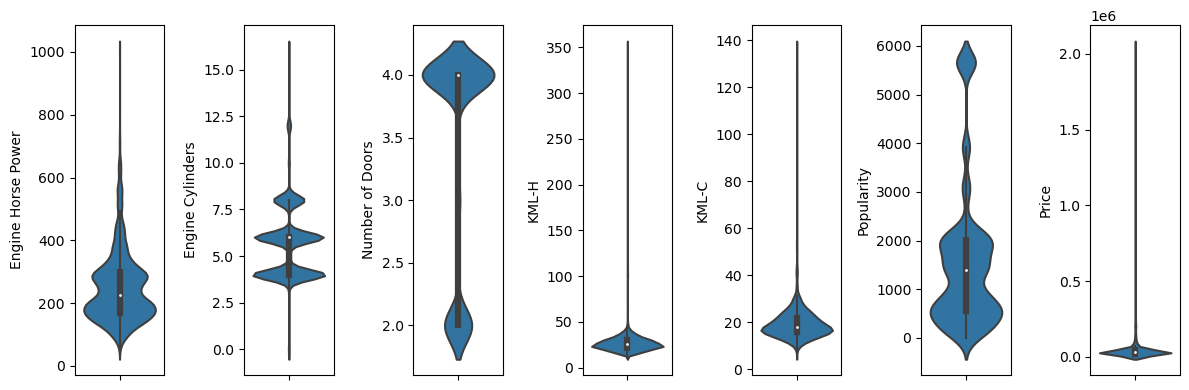

In [11]:
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(1, 7, i+1)
    sns.violinplot(y = df[nums[i]], orient='v')
    plt.tight_layout()

<h2><center>B. Data Cleansing</center></h2>

After data profiling, I'll do data cleansing. **What's data cleansing?**
<br>
Data cleansing is identifying incorrect, incomplete, inaccurate, irrelevant, or missing data and then modifying, replacing, or deleting them according to the need.

<h3><center>B.1. Checking The Missing Value in The Car Brand Column</center></h3>

In [12]:
missing_value_Car_Brand = df["Car Brand"].isnull().sum()
if missing_value_Car_Brand > 0:
    print("There are " + str(missing_value_Car_Brand) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h3><center>B.2. Checking The Missing Value in The Model Column</center></h3>

In [13]:
missing_value_Model = df["Model"].isnull().sum()
if missing_value_Model > 0:
    print("There are " + str(missing_value_Model) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h3><center>B.3. Checking The Missing Value in The Year Column</center></h3>

In [14]:
missing_value_Year = df["Year"].isnull().sum()
if missing_value_Year > 0:
    print("There are " + str(missing_value_Year) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h3><center>B.4. Checking The Missing Value in The Engine Fuel Type Column</center></h3>

In [15]:
missing_value_Engine_Fuel_Type = df["Engine Fuel Type"].isnull().sum()
if missing_value_Engine_Fuel_Type > 0:
    print("There are " + str(missing_value_Engine_Fuel_Type) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There are 3 missing values in this column.


<h4><center>B.4.1. Handling The Missing Value in The Engine Fuel Type Column</center></h4>

In [16]:
print("Here is the data that has a NaN value in the Engine Fuel Type Column:")
df_null_Engine_Fuel_Type = df.loc[df["Engine Fuel Type"].isnull()]
df_null_Engine_Fuel_Type.groupby(["Car Brand", "Model"]).size()

Here is the data that has a NaN value in the Engine Fuel Type Column:


Car Brand  Model 
Suzuki     Verona    3
dtype: int64

The car with the missing value is **Suzuki Verona**. Suzuki Verona uses a **Regular Unleaded**. So I’m gonna turn this missing value into a ‘regular_unleaded’.

In [17]:
df["Engine Fuel Type"] = np.where((df["Engine Fuel Type"].isnull()) & 
                                  (df["Car Brand"] == "Suzuki") & 
                                  (df['Model'] == 'Verona') & 
                                  (df['Year'] == 2004), 'Regular Unleaded', df["Engine Fuel Type"])

checking_again_missing_value_Engine_Fuel_Type = df["Engine Fuel Type"].isnull().sum()
if checking_again_missing_value_Engine_Fuel_Type > 0:
    print("There still are " + str(checking_again_missing_value_Engine_Fuel_Type) + " missing values in this column.")
print("After handling the missing values in this column, there is no missing values in this column.")

After handling the missing values in this column, there is no missing values in this column.


<h3><center>B.5. Checking The Missing Value in The Engine Horse Power Column</center></h3>

In [18]:
missing_value_Engine_Horse_Power = df["Engine Horse Power"].isnull().sum()
if missing_value_Engine_Horse_Power > 0:
    print("There are " + str(missing_value_Engine_Horse_Power) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There are 69 missing values in this column.


<h4><center>B.5.1. Handling The Missing Value in The Engine Horse Power Column</center></h4>

In [19]:
print("Here is the data that has a NaN value in the Engine Horse Power Column:")
df_null_Engine_Horse_Power = df.loc[df["Engine Horse Power"].isnull()]
df_null_Engine_Horse_Power.groupby(["Car Brand", "Model"]).size()

Here is the data that has a NaN value in the Engine Horse Power Column:


Car Brand      Model      
Chevrolet      Impala          6
FIAT           500e            3
Ford           Escape          4
               Focus           3
               Freestar        6
Honda          Fit EV          2
Kia            Soul EV         5
Lincoln        Continental     4
               MKZ             4
Mercedes-Benz  M-Class         1
Mitsubishi     i-MiEV          1
Nissan         Leaf           10
Tesla          Model S        18
Toyota         RAV4 EV         2
dtype: int64

The car with the missing values already mentioned above has a horsepower (HP) as follows:
- Chevrolet Impala's horsepower is 305
- FIAT 500e's horsepower is 111
- Ford Escape's horsepower is 179
- Ford Focus's horsepower is 160
- Ford Freestar's horsepower is 201
- Honda Fit EV's horsepower is 123
- KIA Soul EV's horsepower is 109
- Lincoln Continental's horsepower is 305
- Lincoln MKZ's horsepower is 245
- Mercedes-Benz M-Class's horsepower is 200.
- Mitsubishi i-MiEV's horsepower is 66
- Nissan Leaf's horsepower is 150
- Tesla Model S's horsepower is 1020
- Toyota RAV4 EV's horsepower is 154

In [20]:
df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Chevrolet") & 
                                  (df['Model'] == 'Impala'), 305, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "FIAT") & 
                                  (df['Model'] == '500e'), 111, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Ford") & 
                                  (df['Model'] == 'Escape'), 179, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Ford") & 
                                  (df['Model'] == 'Focus'), 160, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Ford") & 
                                  (df['Model'] == 'Freestar'), 201, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Honda") & 
                                  (df['Model'] == 'Fit EV'), 123, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Kia") & 
                                  (df['Model'] == 'Soul EV'), 109, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Lincoln") & 
                                  (df['Model'] == 'Continental'), 305, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Lincoln") & 
                                  (df['Model'] == 'MKZ'), 245, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Mercedes-Benz") & 
                                  (df['Model'] == 'M-Class'), 200, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Mitsubishi") & 
                                  (df['Model'] == 'i-MiEV'), 66, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Nissan") & 
                                  (df['Model'] == 'Leaf'), 150, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Tesla") & 
                                  (df['Model'] == 'Model S'), 1020, df["Engine Horse Power"])

df["Engine Horse Power"] = np.where((df["Engine Horse Power"].isnull()) & 
                                  (df["Car Brand"] == "Toyota") & 
                                  (df['Model'] == 'RAV4 EV'), 154, df["Engine Horse Power"])


checking_again_missing_value_Engine_Horse_Power = df["Engine Horse Power"].isnull().sum()
if checking_again_missing_value_Engine_Horse_Power > 0:
    print("There still are " + str(checking_again_missing_value_Engine_Horse_Power) + " missing values in this column.")
print("After handling the missing values in this column, there is no missing values in this column.")

After handling the missing values in this column, there is no missing values in this column.


<h3><center>B.6. Checking The Missing Value in The Engine Cylinders Column</center></h3>

In [21]:
checking_missing_value_Engine_Cylinders = df["Engine Cylinders"].isnull().sum()
if checking_missing_value_Engine_Cylinders > 0:
    print("There are " + str(checking_missing_value_Engine_Cylinders) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There are 30 missing values in this column.


<h4><center>B.6.1. Handling The Missing Value in The Engine Cylinders Column</center></h4>

In [22]:
print("Here is the data that has a NaN value in the Engine Cylinders Column:")
df_null_Engine_Cylinders = df.loc[df["Engine Cylinders"].isnull()]
df_null_Engine_Cylinders.groupby(["Car Brand", "Model"]).size()

Here is the data that has a NaN value in the Engine Cylinders Column:


Car Brand   Model  
Chevrolet   Bolt EV     2
Mazda       RX-7        3
            RX-8       17
Mitsubishi  i-MiEV      3
Toyota      RAV4 EV     1
Volkswagen  e-Golf      4
dtype: int64

From the code above, the cars with missing values are **Chevrolet Bolt EV, Volkswagen E-Golf, Toyota Rav4 EV, Mazda RX-7, and Mazda RX-8**. 
<br>
**Chevrolet Bolt EV, Volkswagen E-Golf, and Toyota Rav4 EV are electric cars**, so it **doesn't have cylinders**. Meanwhile, **Mazda RX-7 and Mazda RX-8 use two cylinders**. 

In [23]:
df["Engine Cylinders"] = np.where((df["Engine Cylinders"].isnull()) & 
                                  (df["Car Brand"] == "Mazda") & 
                                  (df['Model'] == 'RX-7') |
                                  (df['Model'] == 'RX-8'), 2, df["Engine Cylinders"])

df["Engine Cylinders"] = np.where((df["Engine Cylinders"].isnull()), 0, df["Engine Cylinders"])


checking_again_missing_value_Engine_Cylinders = df["Engine Cylinders"].isnull().sum()
if checking_again_missing_value_Engine_Cylinders > 0:
    print("There still are " + str(checking_again_missing_value_Engine_Cylinders) + " missing values in this column.")
print("After handling the missing values in this column, there is no missing values in this column.")

After handling the missing values in this column, there is no missing values in this column.


<h3><center>B.7. Checking The Missing Value in The Transmission Type Column</center></h3>

In [24]:
checking_missing_value_Transmission_Type = df["Transmission Type"].isnull().sum()
if checking_missing_value_Transmission_Type > 0:
    print("There are " + str(checking_missing_value_Transmission_Type) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h3><center>B.8. Checking The Missing Value in The Driven Mode Column</center></h3>

In [25]:
checking_missing_value_Driven_Mode = df["Driven Mode"].isnull().sum()
if checking_missing_value_Driven_Mode > 0:
    print("There are " + str(checking_missing_value_Driven_Mode) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h3><center>B.9. Checking The Missing Value in The Number of Doors Column</center></h3>

In [26]:
checking_missing_value_Number_of_Doors = df["Number of Doors"].isnull().sum()
if checking_missing_value_Number_of_Doors > 0:
    print("There are " + str(checking_missing_value_Number_of_Doors) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There are 6 missing values in this column.


<h4><center>B.9.1. Handling The Missing Value in The Number of Doors Column</center></h4>

In [27]:
print("Here is the data that has a NaN value in the Number of Doors Column:")
df_null_Engine_Number_of_Doors = df.loc[df["Number of Doors"].isnull()]
df_null_Engine_Number_of_Doors.groupby(["Car Brand", "Model"]).size()

Here is the data that has a NaN value in the Number of Doors Column:


Car Brand  Model  
Ferrari    FF         1
Tesla      Model S    5
dtype: int64

The car with the missing values already mentioned above has a number of doors as follows:
- Ferrari FF's number of doors are 2
- Tesla Model S's number of doors is 4

In [28]:
df["Number of Doors"] = np.where((df["Number of Doors"].isnull()) & 
                                  (df["Car Brand"] == "Tesla") & 
                                  (df['Model'] == 'Model S'), 4, df["Number of Doors"])

df["Number of Doors"] = np.where((df["Number of Doors"].isnull()) & 
                                  (df["Car Brand"] == "Ferrari") & 
                                  (df['Model'] == 'FF'), 2, df["Number of Doors"])


checking_again_missing_value_Number_of_Doors = df["Number of Doors"].isnull().sum()
if checking_again_missing_value_Number_of_Doors > 0:
    print("There still are " + str(checking_again_missing_value_Number_of_Doors) + " missing values in this column.")
print("After handling the missing values in this column, there is no missing values in this column.")

After handling the missing values in this column, there is no missing values in this column.


<h3><center>B.10. Checking The Missing Value in The Market Category Column</center></h3>

In [29]:
checking_missing_value_Market_Category = df["Market Category"].isnull().sum()
if checking_missing_value_Market_Category > 0:
    print("There are " + str(checking_missing_value_Market_Category) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There are 3742 missing values in this column.


<h4><center>B.10.1. Removing The Market Category Column</center></h4>

In [30]:
df = df.drop(['Market Category'], axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car Brand           11914 non-null  object 
 1   Model               11914 non-null  object 
 2   Year                11914 non-null  int64  
 3   Engine Fuel Type    11914 non-null  object 
 4   Engine Horse Power  11914 non-null  float64
 5   Engine Cylinders    11914 non-null  float64
 6   Transmission Type   11914 non-null  object 
 7   Driven Mode         11914 non-null  object 
 8   Number of Doors     11914 non-null  float64
 9   Vehicle Size        11914 non-null  object 
 10  Vehicle Style       11914 non-null  object 
 11  KML-H               11914 non-null  int64  
 12  KML-C               11914 non-null  int64  
 13  Popularity          11914 non-null  int64  
 14  Price               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+

<h3><center>B.11. Checking The Missing Value in The Vehicle Size Column</center></h3>

In [32]:
checking_missing_value_Vehicle_Size = df["Vehicle Size"].isnull().sum()
if checking_missing_value_Vehicle_Size > 0:
    print("There are " + str(checking_missing_value_Market_Category) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h3><center>B.12. Checking The Missing Value in The Vehicle Style Column</center></h3>

In [33]:
checking_missing_value_Vehicle_Style = df["Vehicle Style"].isnull().sum()
if checking_missing_value_Vehicle_Style > 0:
    print("There are " + str(checking_missing_value_Vehicle_Style) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h3><center>B.13. Checking The Missing Value in The KML-H Column</center></h3>

In [34]:
checking_missing_value_KML_H = df["KML-H"].isnull().sum()
if checking_missing_value_KML_H > 0:
    print("There are " + str(checking_missing_value_KML_H) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h4><center>B.13.1. Changing The Value in The KML-H Column</center></h4>

Changing the KML-H column's values, from mile per gallon to km per liter.

In [35]:
df['KML-H'] = df['KML-H'].apply(lambda x: round(x*0.425144))

<h3><center>B.14. Checking The Missing Value in The KML-C Column</center></h3>

In [36]:
checking_missing_value_KML_C = df["KML-C"].isnull().sum()
if checking_missing_value_KML_C > 0:
    print("There are " + str(checking_missing_value_KML_C) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h4><center>B.14.1. Changing The Value in The KML-C Column</center></h4>

Changing the KML-C column's values, from mile per gallon to km per liter.

In [37]:
df['KML-C'] = df['KML-C'].apply(lambda x: round(x*0.425144))

<h3><center>B.15. Checking The Missing Value in The Popularity Column</center></h3>

In [38]:
checking_missing_value_Popularity = df["Popularity"].isnull().sum()
if checking_missing_value_Popularity > 0:
    print("There are " + str(checking_missing_value_Popularity) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h3><center>B.16. Checking The Missing Value in The Price Column</center></h3>

In [39]:
checking_missing_value_Price = df["Price"].isnull().sum()
if checking_missing_value_Price > 0:
    print("There are " + str(checking_missing_value_Price) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h3><center>B.17. Changing The float64 Data Type Into int64</center></h3>

In [40]:
float_column = list(df.dtypes[df.dtypes == 'float64'].index)
for col in float_column:
    df[col] = df[col].astype("int64")

<h2><center>C. Data Exploration</center></h2>

In [41]:
df.head()

,Car Brand,Model,Year,Engine Fuel Type,Engine Horse Power,Engine Cylinders,Transmission Type,Driven Mode,Number of Doors,Vehicle Size,Vehicle Style,KML-H,KML-C,Popularity,Price
0,BMW,1 Series M,2011,Premium Unleaded (Required),335,6,Manual,Rear Wheel Drive,2,Compact,Coupe,11,8,3916,46135
1,BMW,1 Series,2011,Premium Unleaded (Required),300,6,Manual,Rear Wheel Drive,2,Compact,Convertible,12,8,3916,40650
2,BMW,1 Series,2011,Premium Unleaded (Required),300,6,Manual,Rear Wheel Drive,2,Compact,Coupe,12,9,3916,36350
3,BMW,1 Series,2011,Premium Unleaded (Required),230,6,Manual,Rear Wheel Drive,2,Compact,Coupe,12,8,3916,29450
4,BMW,1 Series,2011,Premium Unleaded (Required),230,6,Manual,Rear Wheel Drive,2,Compact,Convertible,12,8,3916,34500


<h3><center>C.1. Checking How Many Car Brand in The Dataset</center></h3>

In [42]:
print("Here are the TOP TEN of Car Brands that exist in this dataset:")
df_Car_Brand = df.groupby(["Car Brand"]).size().to_frame(name = "Amount").reset_index().sort_values(by = "Amount", ascending = False)
df_Car_Brand_Top_10 = df_Car_Brand.head(10)
df_Car_Brand_Top_10

Here are the TOP TEN of Car Brands that exist in this dataset:


,Car Brand,Amount
9,Chevrolet,1123
14,Ford,881
46,Volkswagen,809
45,Toyota,746
11,Dodge,626
33,Nissan,558
15,GMC,515
18,Honda,449
29,Mazda,423
8,Cadillac,397


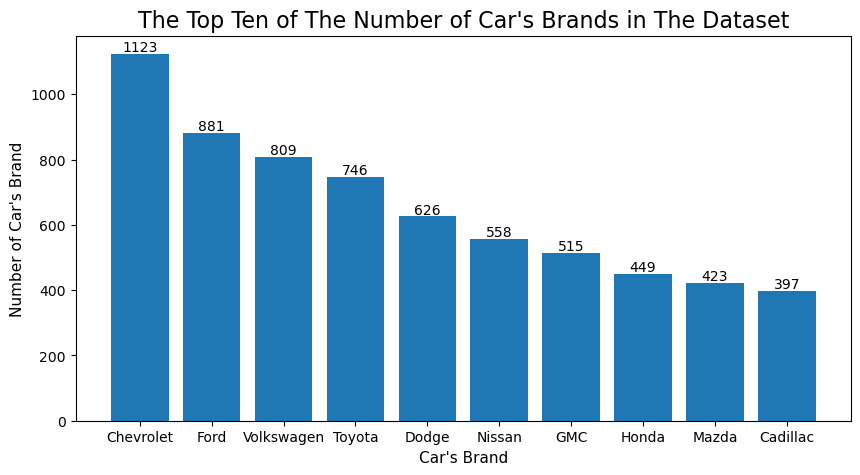

In [43]:
x = df_Car_Brand_Top_10['Car Brand']
y = df_Car_Brand_Top_10['Amount']

plt.figure(figsize = (10, 5))
plt.bar(x, y, align = "center")
plt.title("The Top Ten of The Number of Car's Brands in The Dataset", fontsize = 16)
plt.xlabel("Car's Brand", fontsize = 11)
plt.ylabel("Number of Car's Brand", fontsize = 11)
plt.text(x = "Chevrolet", y = 1130, s = "1123", ha='center',fontsize = 10)
plt.text(x = "Ford", y = 888, s = "881", ha='center',fontsize = 10)
plt.text(x = "Volkswagen", y = 816, s = "809", ha='center',fontsize = 10)
plt.text(x = "Toyota", y = 753, s = "746", ha='center',fontsize = 10)
plt.text(x = "Dodge", y = 633, s = "626", ha='center',fontsize = 10)
plt.text(x = "Nissan", y = 565, s = "558", ha='center',fontsize = 10)
plt.text(x = "GMC", y = 522, s = "515", ha='center',fontsize = 10)
plt.text(x = "Honda", y = 456, s = "449", ha='center',fontsize = 10)
plt.text(x = "Mazda", y = 430, s = "423", ha='center',fontsize = 10)
plt.text(x = "Cadillac", y = 404, s = "397", ha='center',fontsize = 10)
plt.show()

<h3><center>C.2. Checking How Many Car's Model in The Dataset</center></h3>

In [44]:
print("Here are the TOP TEN of Car's Model that exist in this dataset:")
df_Car_Brand_Model = pd.DataFrame({'Amount' : df.groupby(["Car Brand", "Model"]).size()}).reset_index().sort_values(by= 'Amount', ascending=True)
df_Car_Brand_Model_Top_10 = df_Car_Brand_Model.tail(10)
df_Car_Brand_Model_Top_10

Here are the TOP TEN of Car's Model that exist in this dataset:


,Car Brand,Model,Amount
871,Volkswagen,Beetle,75
391,Honda,Accord,75
881,Volkswagen,GTI,76
690,Nissan,Frontier,76
865,Toyota,Tacoma,80
872,Volkswagen,Beetle Convertible,89
372,GMC,Sierra 1500,90
327,Ford,F-150,126
867,Toyota,Tundra,140
218,Chevrolet,Silverado 1500,156


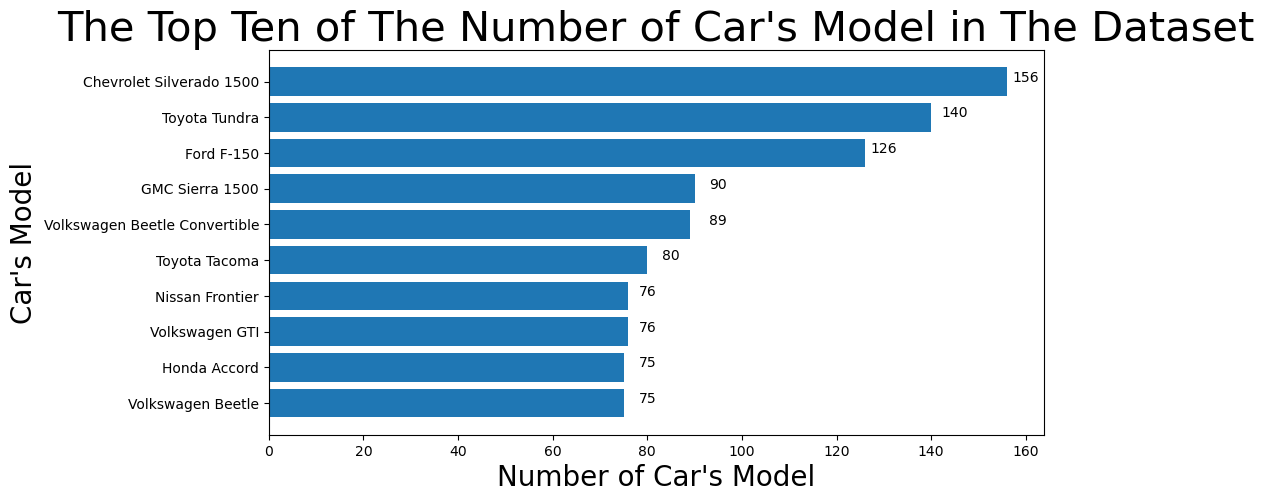

In [45]:
x = df_Car_Brand_Model_Top_10[['Car Brand', 'Model']].apply(lambda x: ' '.join(x), axis=1)
y = df_Car_Brand_Model_Top_10['Amount']

plt.figure(figsize = (10, 5))
plt.barh(x, y, align = "center")
plt.title("The Top Ten of The Number of Car's Model in The Dataset", fontsize = 30)
plt.ylabel("Car's Model", fontsize = 20)
plt.xlabel("Number of Car's Model", fontsize = 20)
plt.text(x = 160, y = "Chevrolet Silverado 1500", s = "156", ha='center',fontsize = 10)
plt.text(x = 145, y = "Toyota Tundra", s = "140", ha='center',fontsize = 10)
plt.text(x = 130, y = "Ford F-150", s = "126", ha='center',fontsize = 10)
plt.text(x = 95, y = "GMC Sierra 1500", s = "90", ha='center',fontsize = 10)
plt.text(x = 95, y = "Volkswagen Beetle Convertible", s = "89", ha='center',fontsize = 10)
plt.text(x = 85, y = "Toyota Tacoma", s = "80", ha='center',fontsize = 10)
plt.text(x = 80, y = "Nissan Frontier", s = "76", ha='center',fontsize = 10)
plt.text(x = 80, y = "Volkswagen GTI", s = "76", ha='center',fontsize = 10)
plt.text(x = 80, y = "Honda Accord", s = "75", ha='center',fontsize = 10)
plt.text(x = 80, y = "Volkswagen Beetle", s = "75", ha='center',fontsize = 10)
plt.show()

<h3><center>C.3. Checking How Many Car Based on Year With The Model in The Dataset</center></h3>

In [46]:
print("Here are the TOP TEN of Year that exist in this dataset:")
df_Car_Year = pd.DataFrame({'Amount' : df.groupby(["Year"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
df_Car_Year_Top_10 = df_Car_Year.head(10)
df_Car_Year_Top_10

Here are the TOP TEN of Year that exist in this dataset:


,Year,Amount
25,2015,2170
26,2016,2157
27,2017,1668
24,2014,589
22,2012,387
19,2009,379
23,2013,366
18,2008,349
17,2007,345
20,2010,298


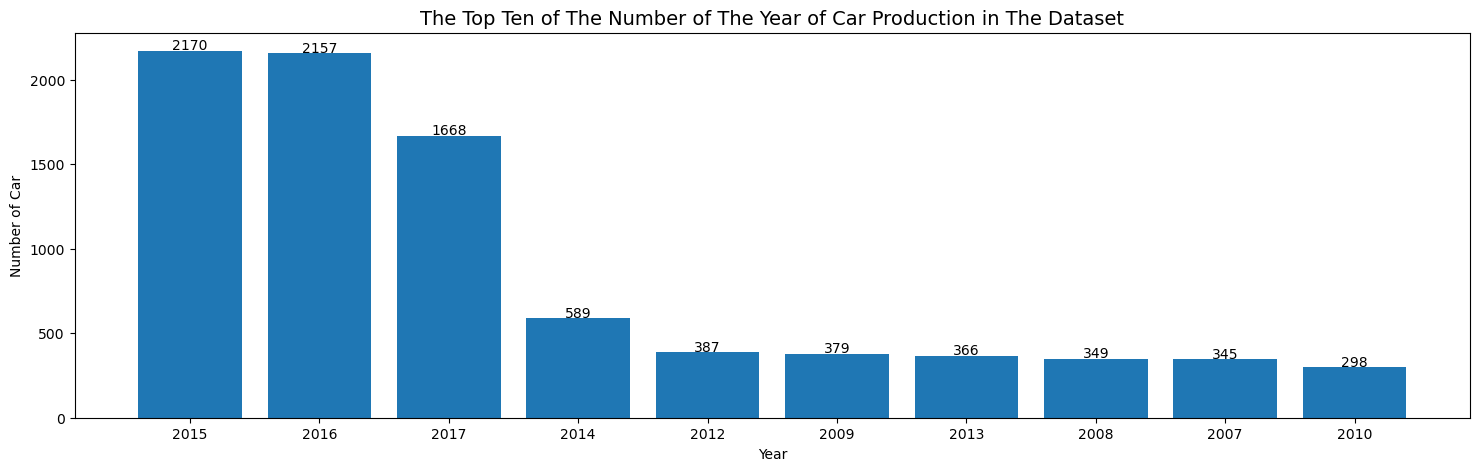

In [47]:
x = df_Car_Year_Top_10['Year'].astype(str)
y = df_Car_Year_Top_10['Amount']

plt.figure(figsize = (18, 5))
plt.bar(x, y, align = "center")
plt.title("The Top Ten of The Number of The Year of Car Production in The Dataset", fontsize = 14)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Number of Car", fontsize = 10)
plt.text(x = "2015", y = 2177, s = "2170", ha='center',fontsize = 10)
plt.text(x = "2016", y = 2164, s = "2157", ha='center',fontsize = 10)
plt.text(x = "2017", y = 1675, s = "1668", ha='center',fontsize = 10)
plt.text(x = "2014", y = 596, s = "589", ha='center',fontsize = 10)
plt.text(x = "2012", y = 394, s = "387", ha='center',fontsize = 10)
plt.text(x = "2009", y = 386, s = "379", ha='center',fontsize = 10)
plt.text(x = "2013", y = 373, s = "366", ha='center',fontsize = 10)
plt.text(x = "2008", y = 356, s = "349", ha='center',fontsize = 10)
plt.text(x = "2007", y = 352, s = "345", ha='center',fontsize = 10)
plt.text(x = "2010", y = 305, s = "298", ha='center',fontsize = 10)
plt.show()

<h3><center>C.4. Checking The Number of The Newest Car in The Dataset</center></h3>

In [48]:
print("Here are the Number of The Newest Car that exist in this dataset:")
pd.DataFrame({'Amount' : df.groupby(["Year"]).size()}).reset_index().sort_values(by= 'Year', ascending=False).head(1)

Here are the Number of The Newest Car that exist in this dataset:


,Year,Amount
27,2017,1668


<h3><center>C.5. Checking The Number of The Oldest Car in The Dataset</center></h3>

In [49]:
print("Here are the Number of The Oldest Car that exist in this dataset:")
pd.DataFrame({'Amount' : df.groupby(["Year"]).size()}).reset_index().sort_values(by= 'Year', ascending=True).head(1)

Here are the Number of The Oldest Car that exist in this dataset:


,Year,Amount
0,1990,123


<h3><center>C.6. Checking The Number of Engine Fuel Type</center></h3>

In [50]:
print("Here are the number of Engine Fuel Type that exist in this dataset:")
df_Car_Engine_Fuel_Type = pd.DataFrame({'Amount' : df.groupby(["Engine Fuel Type"]).size()}).reset_index().sort_values(by= 'Amount', ascending=True)
df_Car_Engine_Fuel_Type

Here are the number of Engine Fuel Type that exist in this dataset:


,Engine Fuel Type,Amount
6,Natural Gas,2
5,Flex-Fuel (Unleaded/Natural Gas),6
2,Flex-Fuel (Premium Unleaded Recommended/E85),26
3,Flex-Fuel (Premium Unleaded Required/E85),54
1,Electric,66
0,Diesel,154
4,Flex-Fuel (Unleaded/E85),899
7,Premium Unleaded (Recommended),1523
8,Premium Unleaded (Required),2009
9,Regular Unleaded,7175


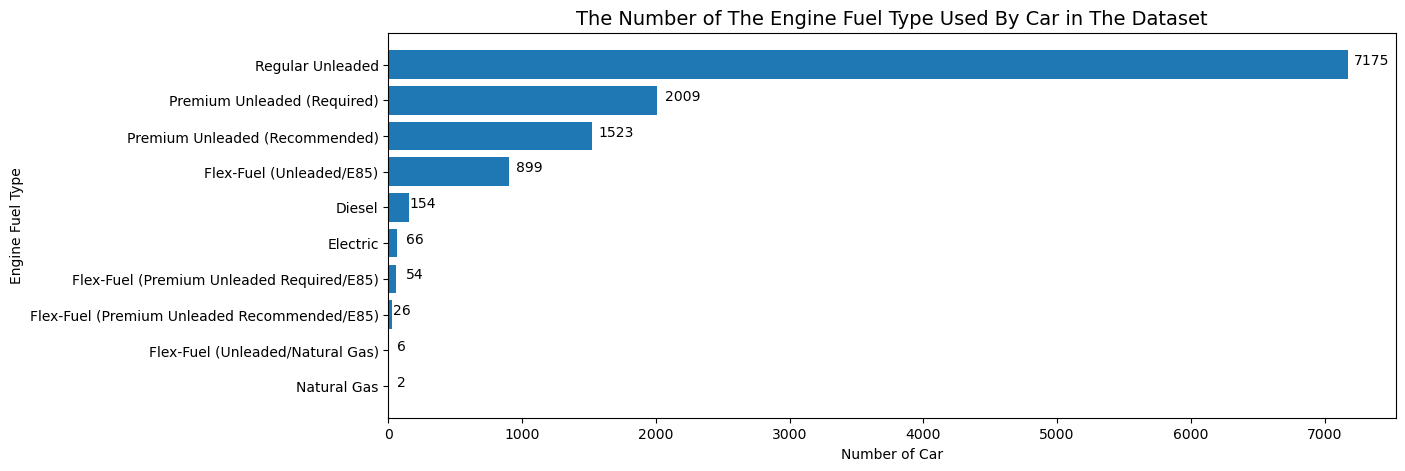

In [51]:
x = df_Car_Engine_Fuel_Type['Engine Fuel Type']
y = df_Car_Engine_Fuel_Type['Amount']

plt.figure(figsize = (13, 5))
plt.barh(x, y, align = "center")
plt.title("The Number of The Engine Fuel Type Used By Car in The Dataset", fontsize = 14)
plt.ylabel("Engine Fuel Type", fontsize = 10)
plt.xlabel("Number of Car", fontsize = 10)
plt.text(x = 100, y = "Natural Gas", s = "2", ha='center',fontsize = 10)
plt.text(x = 100, y = "Flex-Fuel (Unleaded/Natural Gas)", s = "6", ha='center',fontsize = 10)
plt.text(x = 100, y = "Flex-Fuel (Premium Unleaded Recommended/E85)", s = "26", ha='center',fontsize = 10)
plt.text(x = 200, y = "Flex-Fuel (Premium Unleaded Required/E85)", s = "54", ha='center',fontsize = 10)
plt.text(x = 200, y = "Electric", s = "66", ha='center',fontsize = 10)
plt.text(x = 260, y = "Diesel", s = "154", ha='center',fontsize = 10)
plt.text(x = 1050, y = "Flex-Fuel (Unleaded/E85)", s = "899", ha='center',fontsize = 10)
plt.text(x = 1700, y = "Premium Unleaded (Recommended)", s = "1523", ha='center',fontsize = 10)
plt.text(x = 2200, y = "Premium Unleaded (Required)", s = "2009", ha='center',fontsize = 10)
plt.text(x = 7350, y = "Regular Unleaded", s = "7175", ha='center',fontsize = 10)
plt.show()

<h3><center>C.7. Checking The Number of Transmission Type</center></h3>

In [52]:
print("Here are the number of Transmission Type that exist in this dataset:")
df_Car_Transmision_Type = pd.DataFrame({'Amount' : df.groupby(["Transmission Type"]).size()}).reset_index().sort_values(by= 'Amount', ascending=True)
df_Car_Transmision_Type

Here are the number of Transmission Type that exist in this dataset:


,Transmission Type,Amount
4,Unknown,19
2,Direct_Drive,68
0,Automated_Manual,626
3,Manual,2935
1,Automatic,8266


<h4><center>C.7.1. Changing The Unknown Value</center></h4>

In [53]:
df_unkown = df.loc[df["Transmission Type"] == "Unknown"]
df_unkown.groupby(["Car Brand", "Model"]).size()

Car Brand   Model   
Chrysler    Le Baron    2
Dodge       RAM 150     8
GMC         Jimmy       4
Oldsmobile  Achieva     2
Pontiac     Firebird    3
dtype: int64

In [54]:
df["Transmission Type"] = np.where((df["Transmission Type"] == "Unknown") & 
                                  (df["Car Brand"] == "Chrysler") & 
                                  (df['Model'] == 'Le Baron'), "Manual", df["Transmission Type"])
df["Transmission Type"] = np.where((df["Transmission Type"] == "Unknown") & 
                                  (df["Car Brand"] == "Dodge") & 
                                  (df['Model'] == 'RAM 150'), "Manual", df["Transmission Type"])
df["Transmission Type"] = np.where((df["Transmission Type"] == "Unknown") & 
                                  (df["Car Brand"] == "GMC") & 
                                  (df['Model'] == 'Jimmy'), "Automatic", df["Transmission Type"])
df["Transmission Type"] = np.where((df["Transmission Type"] == "Unknown") & 
                                  (df["Car Brand"] == "Oldsmobile") & 
                                  (df['Model'] == 'Achieva'), "Manual", df["Transmission Type"])
df["Transmission Type"] = np.where((df["Transmission Type"] == "Unknown") & 
                                  (df["Car Brand"] == "Pontiac") & 
                                  (df['Model'] == 'Firebird'), "Manual", df["Transmission Type"])

In [55]:
print("Here are the number of Transmission Type that exist in this dataset after changing the \"UNKNOWN\":")
df_Car_Transmision_Type_New = pd.DataFrame({'Amount' : df.groupby(["Transmission Type"]).size()}).reset_index().sort_values(by= 'Amount', ascending=True)
df_Car_Transmision_Type_New

Here are the number of Transmission Type that exist in this dataset after changing the "UNKNOWN":


,Transmission Type,Amount
2,Direct_Drive,68
0,Automated_Manual,626
3,Manual,2950
1,Automatic,8270


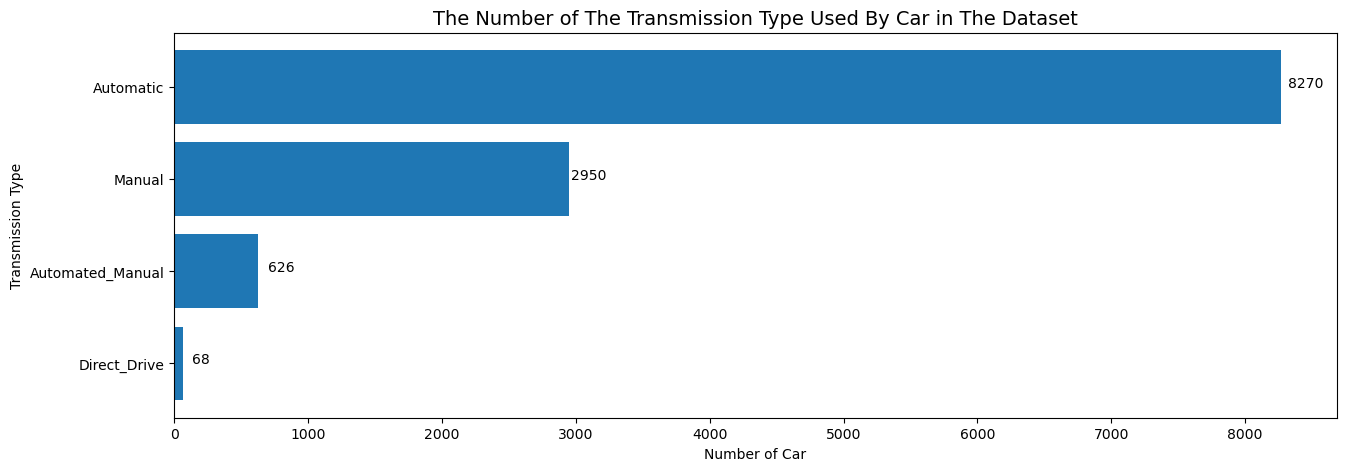

In [56]:
x = df_Car_Transmision_Type_New['Transmission Type']
y = df_Car_Transmision_Type_New['Amount']

plt.figure(figsize = (15, 5))
plt.barh(x, y, align = "center")
plt.title("The Number of The Transmission Type Used By Car in The Dataset", fontsize = 14)
plt.ylabel("Transmission Type", fontsize = 10)
plt.xlabel("Number of Car", fontsize = 10)
plt.text(x = 8450, y = "Automatic", s = "8270", ha='center',fontsize = 10)
plt.text(x = 3100, y = "Manual", s = "2950", ha='center',fontsize = 10)
plt.text(x = 800, y = "Automated_Manual", s = "626", ha='center',fontsize = 10)
plt.text(x = 200, y = "Direct_Drive", s = "68", ha='center',fontsize = 10)
plt.show()

<h3><center>C.8. Checking The Number of Driven Mode</center></h3>

In [57]:
print("Here are the number of Driven Mode that exist in this dataset:")
df_Car_Driven_Mode = pd.DataFrame({'Amount' : df.groupby(["Driven Mode"]).size()}).reset_index().sort_values(by= 'Amount', ascending=True)
df_Car_Driven_Mode

Here are the number of Driven Mode that exist in this dataset:


,Driven Mode,Amount
1,Four Wheel Drive,1403
0,All Wheel Drive,2353
3,Rear Wheel Drive,3371
2,Front Wheel Drive,4787


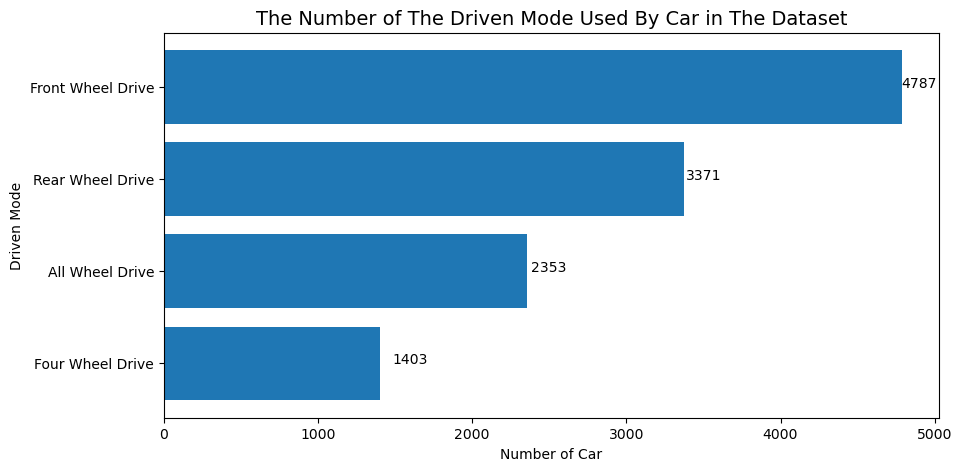

In [58]:
x = df_Car_Driven_Mode['Driven Mode']
y = df_Car_Driven_Mode['Amount']

plt.figure(figsize = (10, 5))
plt.barh(x, y, align = "center")
plt.title("The Number of The Driven Mode Used By Car in The Dataset", fontsize = 14)
plt.ylabel("Driven Mode", fontsize = 10)
plt.xlabel("Number of Car", fontsize = 10)
plt.text(x = 4900, y = "Front Wheel Drive", s = "4787", ha='center',fontsize = 10)
plt.text(x = 3500, y = "Rear Wheel Drive", s = "3371", ha='center',fontsize = 10)
plt.text(x = 2500, y = "All Wheel Drive", s = "2353", ha='center',fontsize = 10)
plt.text(x = 1600, y = "Four Wheel Drive", s = "1403", ha='center',fontsize = 10)
plt.show()

<h3><center>C.9. Checking The Number of Doors</center></h3>

In [59]:
print("Here are the number of doors that exist in this dataset:")
df_Car_Number_of_Doors = pd.DataFrame({'Amount' : df.groupby(["Number of Doors"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
df_Car_Number_of_Doors

Here are the number of doors that exist in this dataset:


,Number of Doors,Amount
2,4,8358
0,2,3161
1,3,395


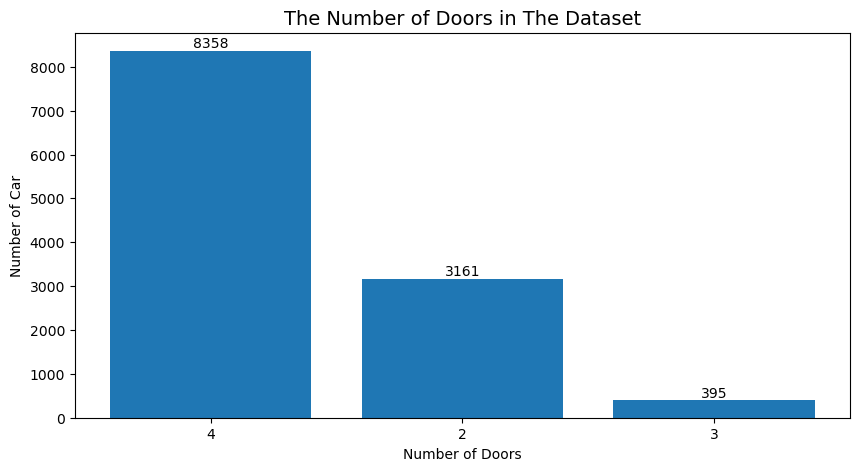

In [60]:
x = df_Car_Number_of_Doors['Number of Doors'].astype(str)
y = df_Car_Number_of_Doors['Amount']

plt.figure(figsize = (10, 5))
plt.bar(x, y, align = "center")
plt.title("The Number of Doors in The Dataset", fontsize = 14)
plt.xlabel("Number of Doors", fontsize = 10)
plt.ylabel("Number of Car", fontsize = 10)
plt.text(x = "4", y = 8450, s = "8358", ha='center',fontsize = 10)
plt.text(x = "2", y = 3250, s = "3161", ha='center',fontsize = 10)
plt.text(x = "3", y = 460, s = "395", ha='center',fontsize = 10)
plt.show()

<h3><center>C.10. Checking The Number of Vehicle Size</center></h3>

In [61]:
print("Here are the number of Vehicle Size that exist in this dataset:")
df_Car_Vehicle_Size = pd.DataFrame({'Amount' : df.groupby(["Vehicle Size"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
df_Car_Vehicle_Size

Here are the number of Vehicle Size that exist in this dataset:


,Vehicle Size,Amount
0,Compact,4764
2,Midsize,4373
1,Large,2777


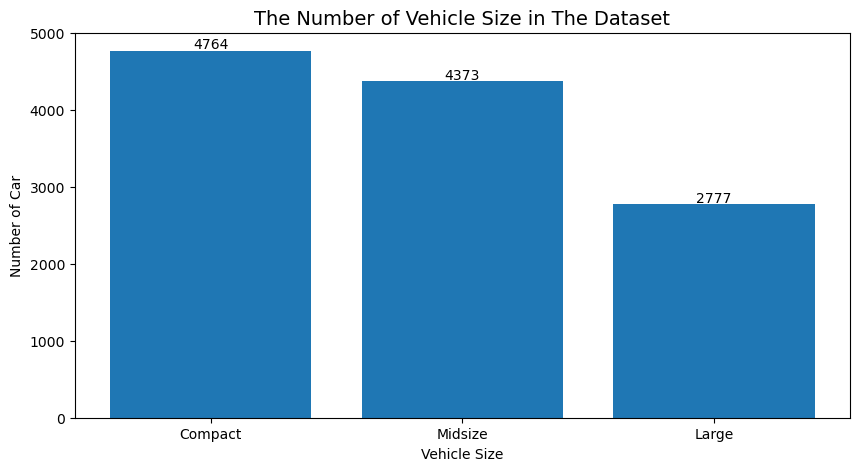

In [62]:
x = df_Car_Vehicle_Size['Vehicle Size'].astype(str)
y = df_Car_Vehicle_Size['Amount']

plt.figure(figsize = (10, 5))
plt.bar(x, y, align = "center")
plt.title("The Number of Vehicle Size in The Dataset", fontsize = 14)
plt.xlabel("Vehicle Size", fontsize = 10)
plt.ylabel("Number of Car", fontsize = 10)
plt.text(x = "Compact", y = 4800, s = "4764", ha='center',fontsize = 10)
plt.text(x = "Midsize", y = 4400, s = "4373", ha='center',fontsize = 10)
plt.text(x = "Large", y = 2800, s = "2777", ha='center',fontsize = 10)
plt.show()

<h3><center>C.11. Checking The Number of Vehicle Style</center></h3>

In [63]:
print("Here are the number of Vehicle Style that exist in this dataset:")
df_Car_Vehicle_Style = pd.DataFrame({'Amount' : df.groupby(["Vehicle Style"]).size()}).reset_index().sort_values(by= 'Amount', ascending=True)
df_Car_Vehicle_Style

Here are the number of Vehicle Style that exist in this dataset:


,Vehicle Style,Amount
7,Convertible Suv,29
4,Cargo Minivan,71
5,Cargo Van,95
12,Passenger Van,128
1,2Dr Suv,138
13,Regular Cab Pickup,392
11,Passenger Minivan,417
0,2Dr Hatchback,506
15,Wagon,592
10,Extended Cab Pickup,623


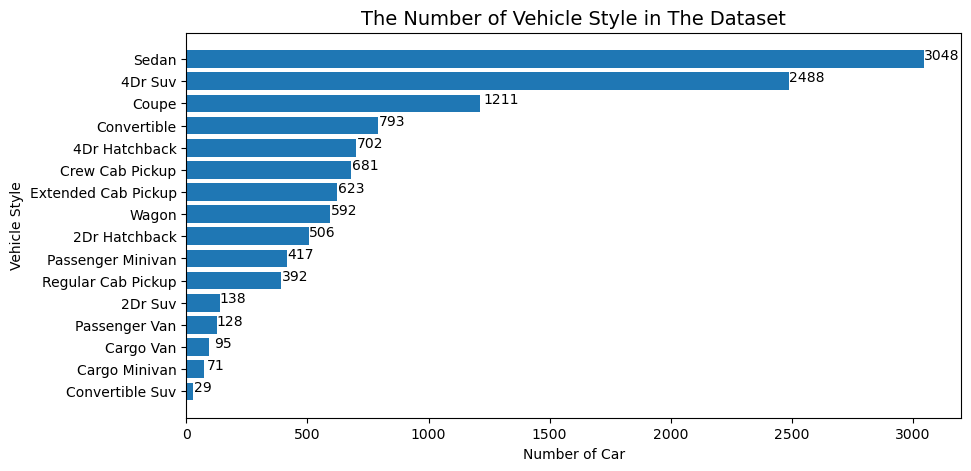

In [64]:
x = df_Car_Vehicle_Style['Vehicle Style']
y = df_Car_Vehicle_Style['Amount']

plt.figure(figsize = (10, 5))
plt.barh(x, y, align = "center")
plt.title("The Number of Vehicle Style in The Dataset", fontsize = 14)
plt.ylabel("Vehicle Style", fontsize = 10)
plt.xlabel("Number of Car", fontsize = 10)
plt.text(x = 3120, y = "Sedan", s = "3048", ha='center',fontsize = 10)
plt.text(x = 2560, y = "4Dr Suv", s = "2488", ha='center',fontsize = 10)
plt.text(x = 1300, y = "Coupe", s = "1211", ha='center',fontsize = 10)
plt.text(x = 850, y = "Convertible", s = "793", ha='center',fontsize = 10)
plt.text(x = 760, y = "4Dr Hatchback", s = "702", ha='center',fontsize = 10)
plt.text(x = 740, y = "Crew Cab Pickup", s = "681", ha='center',fontsize = 10)
plt.text(x = 680, y = "Extended Cab Pickup", s = "623", ha='center',fontsize = 10)
plt.text(x = 650, y = "Wagon", s = "592", ha='center',fontsize = 10)
plt.text(x = 560, y = "2Dr Hatchback", s = "506", ha='center',fontsize = 10)
plt.text(x = 470, y = "Passenger Minivan", s = "417", ha='center',fontsize = 10)
plt.text(x = 450, y = "Regular Cab Pickup", s = "392", ha='center',fontsize = 10)
plt.text(x = 190, y = "2Dr Suv", s = "138", ha='center',fontsize = 10)
plt.text(x = 180, y = "Passenger Van", s = "128", ha='center',fontsize = 10)
plt.text(x = 150, y = "Cargo Van", s = "95", ha='center',fontsize = 10)
plt.text(x = 120, y = "Cargo Minivan", s = "71", ha='center',fontsize = 10)
plt.text(x = 70, y = "Convertible Suv", s = "29", ha='center',fontsize = 10)
plt.show()

<h3><center>C.12. Checking The Lowest Price</center></h3>

In [65]:
lowest_price = df.sort_values(by = "Price", ascending = True).reset_index()
print("The car that has the lowest price is " + str(lowest_price["Year"][0]) + "\'s " + lowest_price["Car Brand"][0] + " " + lowest_price["Model"][0] + " with $" + str(lowest_price["Price"][0]))

The car that has the lowest price is 1992's Dodge Ram 50 Pickup with $2000


<h3><center>C.13. Checking The Lowest Average Price</center></h3>

In [66]:
lowest_avg_price = df.groupby(["Car Brand", "Model"])["Price"].mean().sort_values(ascending = True).reset_index()
print("The car that has the lowest average price is " + lowest_avg_price["Car Brand"][0] + " " + lowest_avg_price["Model"][0] + " with $" + str(int(lowest_avg_price["Price"][0])))

The car that has the lowest average price is Ford Festiva with $2000


<h3><center>C.14. Checking The Highest Price</center></h3>

In [67]:
highest_price = df.sort_values(by = "Price", ascending = False).reset_index()
print("The car that has the highest price is " + str(highest_price["Year"][0]) + "\'s " + highest_price["Car Brand"][0] + " " + highest_price["Model"][0] + " with $" + str(highest_price["Price"][0]))

The car that has the highest price is 2008's Bugatti Veyron 16.4 with $2065902


<h3><center>C.15. Checking The Highest Average Price</center></h3>

In [68]:
highest_avg_price = df.groupby(["Car Brand", "Model"])["Price"].mean().sort_values(ascending = False).reset_index()
print("The car that has the highest average price is " + highest_avg_price["Car Brand"][0] + " " + highest_avg_price["Model"][0] + " with $" + str(int(highest_avg_price["Price"][0])))

The car that has the highest average price is Bugatti Veyron 16.4 with $1757223


<h3><center>C.16. Checking Which Cars Are The Most Wasteful When It Comes To Fuel Consumption in The Highway</center></h3>

In [69]:
most_wastefull_highway = df.groupby(["Car Brand", "Model"])["KML-H"].mean().sort_values(ascending = True).reset_index()
print("The most wasteful car when it comes to fuel consumption in the highway is " + most_wastefull_highway["Car Brand"][0] + " " + most_wastefull_highway["Model"][0] + " with " + str(int(most_wastefull_highway["KML-H"][0])) + " Kilometer Per Liter.")

The most wasteful car when it comes to fuel consumption in the highway is Lamborghini Diablo with 5 Kilometer Per Liter.


<h3><center>C.17. Checking Which Cars Are The Least Wasteful When It Comes To Fuel Consumption in The Highway</center></h3>

In [70]:
least_wastefull_highway = df.groupby(["Car Brand", "Model"])["KML-H"].mean().sort_values(ascending = False).reset_index()
print("The least wasteful car when it comes to fuel consumption in the highway is " + least_wastefull_highway["Car Brand"][0] + " " + least_wastefull_highway["Model"][0] + " with " + str(int(least_wastefull_highway["KML-H"][0])) + " Kilometer Per Liter.")

The least wasteful car when it comes to fuel consumption in the highway is Chevrolet Bolt EV with 47 Kilometer Per Liter.


<h3><center>C.18. Checking Which Cars Are The Most Wasteful When It Comes To Fuel Consumption in The City</center></h3>

In [71]:
most_wastefull_city = df.groupby(["Car Brand", "Model"])["KML-C"].mean().sort_values(ascending = True).reset_index()
print("The most wasteful car when it comes to fuel consumption in the city is " + most_wastefull_city["Car Brand"][0] + " " + most_wastefull_city["Model"][0] + " with " + str(int(most_wastefull_city["KML-C"][0])) + " Kilometer Per Liter.")

The most wasteful car when it comes to fuel consumption in the city is Ferrari 550 with 3 Kilometer Per Liter.


<h3><center>C.19. Checking Which Cars Are The Least Wasteful When It Comes To Fuel Consumption in The City</center></h3>

In [72]:
least_wastefull_city = df.groupby(["Car Brand", "Model"])["KML-C"].mean().sort_values(ascending = False).reset_index()
print("The least wasteful car when it comes to fuel consumption in the city is " + least_wastefull_city["Car Brand"][0] + " " + least_wastefull_city["Model"][0] + " with " + str(int(least_wastefull_city["KML-C"][0])) + " Kilometer Per Liter.")

The least wasteful car when it comes to fuel consumption in the city is BMW i3 with 57 Kilometer Per Liter.


<h3><center>C.20. Checking The Correlation</center></h3>

<h4><center>C.20.1. Checking The Correlation Between Year, Engine Horse Power, Engine Cylinders, Number of Doors, KML-H, KML-C, Popularity, and Price Column</center></h4>

In [73]:
df_corr = df.copy()
corr_mat = df_corr.corr(method = "pearson")
corr_mat

,Year,Engine Horse Power,Engine Cylinders,Number of Doors,KML-H,KML-C,Popularity,Price
Year,1.000000,0.343764,-0.041617,0.263855,0.255610,0.203616,0.073049,0.227590
Engine Horse Power,0.343764,1.000000,0.709148,-0.093349,-0.272953,-0.266886,0.032661,0.645113
Engine Cylinders,-0.041617,0.709148,1.000000,-0.142554,-0.615267,-0.584627,0.044185,0.528369
Number of Doors,0.263855,-0.093349,-0.142554,1.000000,0.120252,0.119646,-0.048407,-0.126876
KML-H,0.255610,-0.272953,-0.615267,0.120252,1.000000,0.881786,-0.021399,-0.158769
KML-C,0.203616,-0.266886,-0.584627,0.119646,0.881786,1.000000,-0.004252,-0.153936
Popularity,0.073049,0.032661,0.044185,-0.048407,-0.021399,-0.004252,1.000000,-0.048476
Price,0.227590,0.645113,0.528369,-0.126876,-0.158769,-0.153936,-0.048476,1.000000


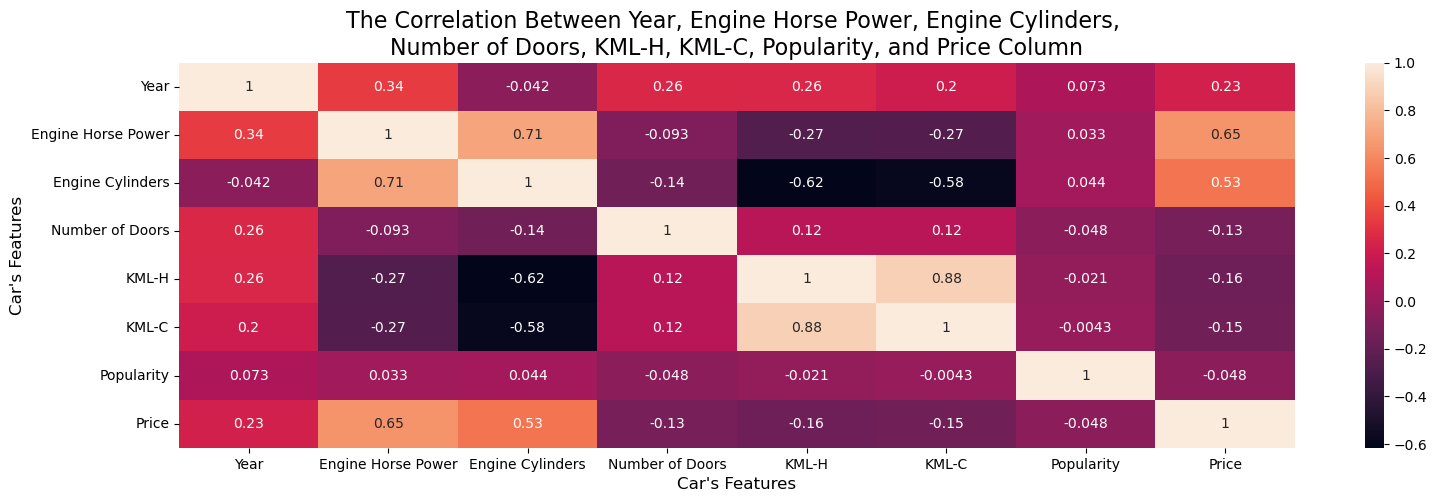

In [74]:
plt.figure(figsize = (18, 5))
sns.heatmap(corr_mat, annot = True)
plt.title("The Correlation Between Year, Engine Horse Power, Engine Cylinders, \nNumber of Doors, KML-H, KML-C, Popularity, and Price Column", fontsize = 16)
plt.xlabel("Car's Features", fontsize = 12)
plt.ylabel("Car's Features", fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

<h4><center>C.20.2. Checking The Highest Correlation Between Year, Engine Horse Power, Engine Cylinders, Number of Doors, KML-H, KML-C, Popularity, and Price Column</center></h4>

In [75]:
corr_pairs = corr_mat.unstack()
sorted_corr = corr_pairs.sort_values()
high_corr = sorted_corr[(sorted_corr) > 0.5]
high_corr.to_frame("Pearson Correlation")

Pearson Correlation
Engine Cylinders   Price                          0.528369
Price              Engine Cylinders               0.528369
                   Engine Horse Power             0.645113
Engine Horse Power Price                          0.645113
Engine Cylinders   Engine Horse Power             0.709148
Engine Horse Power Engine Cylinders               0.709148
KML-C              KML-H                          0.881786
KML-H              KML-C                          0.881786
Year               Year                           1.000000
KML-C              KML-C                          1.000000
KML-H              KML-H                          1.000000
Number of Doors    Number of Doors                1.000000
Engine Cylinders   Engine Cylinders               1.000000
Engine Horse Power Engine Horse Power             1.000000
Popularity         Popularity                     1.000000
Price              Price                          1.000000

<h4><center>C.20.3. Checking The Correlation Between All Column</center></h4>

In [76]:
df_numerized = df.copy()
for column in df_numerized.columns:
    if (df_numerized[column].dtype == "object"):
        df_numerized[column] = df_numerized[column].astype("category")
        df_numerized[column] = df_numerized[column].cat.codes

df_numerized

,Car Brand,Model,Year,Engine Fuel Type,Engine Horse Power,Engine Cylinders,Transmission Type,Driven Mode,Number of Doors,Vehicle Size,Vehicle Style,KML-H,KML-C,Popularity,Price
0,4,1,2011,8,335,6,3,3,2,0,8,11,8,3916,46135
1,4,0,2011,8,300,6,3,3,2,0,6,12,8,3916,40650
2,4,0,2011,8,300,6,3,3,2,0,8,12,9,3916,36350
3,4,0,2011,8,230,6,3,3,2,0,8,12,8,3916,29450
4,4,0,2011,8,230,6,3,3,2,0,6,12,8,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,901,2012,8,300,6,1,0,4,2,2,10,7,204,46120
11910,0,901,2012,8,300,6,1,0,4,2,2,10,7,204,56670
11911,0,901,2012,8,300,6,1,0,4,2,2,10,7,204,50620
11912,0,901,2013,7,300,6,1,0,4,2,2,10,7,204,50920


In [77]:
corr_mat_num = df_numerized.corr(method = "pearson")
corr_mat_num

,Car Brand,Model,Year,Engine Fuel Type,Engine Horse Power,Engine Cylinders,Transmission Type,Driven Mode,Number of Doors,Vehicle Size,Vehicle Style,KML-H,KML-C,Popularity,Price
Car Brand,1.000000,0.037819,-0.013936,0.115823,-0.203279,-0.265474,0.046237,-0.035689,0.057468,-0.102262,-0.057137,0.134609,0.153306,-0.297651,-0.107331
Model,0.037819,1.000000,0.030913,-0.010129,0.005071,0.062676,-0.075454,-0.071920,0.138736,0.020197,-0.091614,-0.102962,-0.030614,-0.073725,-0.029843
Year,-0.013936,0.030913,1.000000,-0.253914,0.343764,-0.041617,-0.358551,-0.183914,0.263855,0.102098,-0.067713,0.255610,0.203616,0.073049,0.227590
Engine Fuel Type,0.115823,-0.010129,-0.253914,1.000000,-0.222543,-0.065541,0.122626,0.019046,-0.004793,-0.049011,-0.044167,-0.168268,-0.187010,-0.059459,-0.114778
Engine Horse Power,-0.203279,0.005071,0.343764,-0.222543,1.000000,0.709148,-0.223773,-0.040174,-0.093349,0.202431,0.027279,-0.272953,-0.266886,0.032661,0.645113
Engine Cylinders,-0.265474,0.062676,-0.041617,-0.065541,0.709148,1.000000,-0.169498,0.081200,-0.142554,0.200172,0.036326,-0.615267,-0.584627,0.044185,0.528369
Transmission Type,0.046237,-0.075454,-0.358551,0.122626,-0.223773,-0.169498,1.000000,0.172611,-0.332732,-0.305725,-0.033935,0.047929,0.045891,0.011269,-0.180975
Driven Mode,-0.035689,-0.071920,-0.183914,0.019046,-0.040174,0.081200,0.172611,1.000000,-0.253643,-0.132160,0.099985,-0.001827,-0.012085,0.026987,-0.037943
Number of Doors,0.057468,0.138736,0.263855,-0.004793,-0.093349,-0.142554,-0.332732,-0.253643,1.000000,0.267043,0.202836,0.120252,0.119646,-0.048407,-0.126876
Vehicle Size,-0.102262,0.020197,0.102098,-0.049011,0.202431,0.200172,-0.305725,-0.132160,0.267043,1.000000,0.166140,-0.113264,-0.140490,-0.003995,0.037162


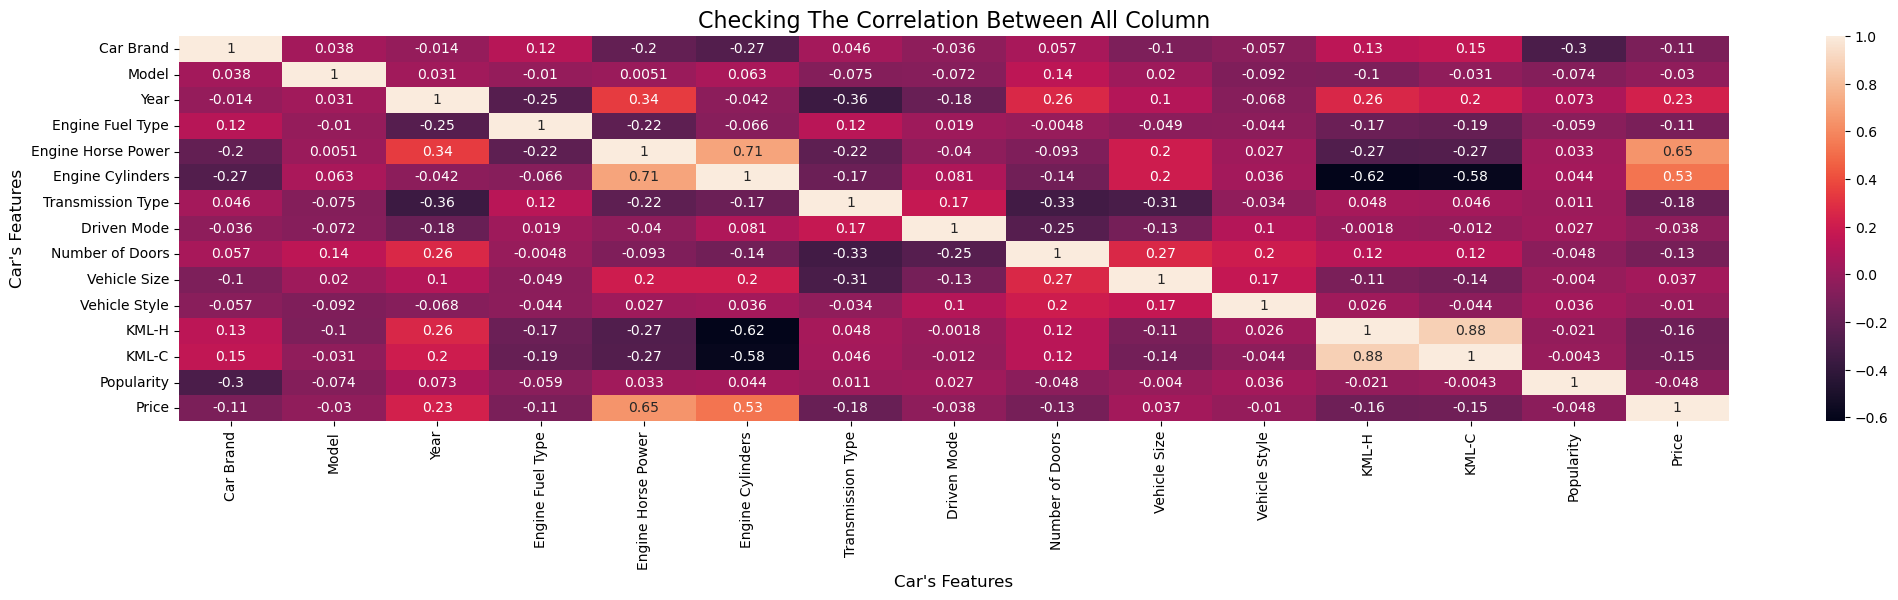

In [78]:
plt.figure(figsize = (25, 5))
sns.heatmap(corr_mat_num, annot = True)
plt.title("Checking The Correlation Between All Column", fontsize = 16)
plt.xlabel("Car's Features", fontsize = 12)
plt.ylabel("Car's Features", fontsize = 12)
plt.show()

<h4><center>C.20.4. Checking The Highest Correlation Between All Column</center></h4>

In [79]:
corr_pairs_num = corr_mat_num.unstack()
sorted_corr_num = corr_pairs_num.sort_values()
high_corr_num = sorted_corr_num[(sorted_corr_num) > 0.5]
high_corr_num.to_frame("Pearson Correlation")

Pearson Correlation
Price              Engine Cylinders               0.528369
Engine Cylinders   Price                          0.528369
Price              Engine Horse Power             0.645113
Engine Horse Power Price                          0.645113
                   Engine Cylinders               0.709148
Engine Cylinders   Engine Horse Power             0.709148
KML-H              KML-C                          0.881786
KML-C              KML-H                          0.881786
Car Brand          Car Brand                      1.000000
Driven Mode        Driven Mode                    1.000000
KML-C              KML-C                          1.000000
KML-H              KML-H                          1.000000
Vehicle Style      Vehicle Style                  1.000000
Vehicle Size       Vehicle Size                   1.000000
Number of Doors    Number of Doors                1.000000
Transmission Type  Transmission Type              1.000000
Engine Cylinders   Engine Cylinders               1.000000
Engine Horse Power Engine Horse Power             1.000000
Engine Fuel Type   Engine Fuel Type               1.000000
Year               Year                           1.000000
Model              Model                          1.000000
Popularity         Popularity                     1.000000
Price              Price                          1.000000

<h2><center>D. Build A Machine Learning Model</center></h2>

<h3><center>D.1. Removing Duplicates in The Data</center></h3>

In this section, I’m going to remove the duplicated data.

In [80]:
df_machine_learning = df.copy()
df_machine_learning.drop_duplicates(inplace=True)
print('The Shape of The Data Before Removing The Duplicated Data: ', df.shape)
print('The Shape of The Data After Removing The Duplicated Data: ', df_machine_learning.shape)

The Shape of The Data Before Removing The Duplicated Data:  (11914, 15)
The Shape of The Data After Removing The Duplicated Data:  (11191, 15)


<h3><center>D.2. Label Encoding on The Dataset</center></h3>

In [81]:
car_brand = pd.get_dummies(df_machine_learning['Car Brand'], drop_first=True)
model = pd.get_dummies(df_machine_learning['Model'], drop_first=True)
engine_fuel_type = pd.get_dummies(df_machine_learning['Engine Fuel Type'], drop_first=True)
transmission_type = pd.get_dummies(df_machine_learning['Transmission Type'], drop_first=True)
driven_mode = pd.get_dummies(df_machine_learning['Driven Mode'], drop_first=True)
vehicle_size = pd.get_dummies(df_machine_learning['Vehicle Size'], drop_first=True)
vehicle_style = pd.get_dummies(df_machine_learning['Vehicle Style'], drop_first=True)

df_machine_learning = df_machine_learning.drop(['Car Brand',
                                                'Model',
                                                'Engine Fuel Type',
                                                'Transmission Type',
                                                'Driven Mode',
                                                'Vehicle Size',
                                                'Vehicle Style'], axis=1)

df_machine_learning = pd.concat([car_brand,
                                 model,
                                 engine_fuel_type,
                                 transmission_type,
                                 driven_mode,
                                 vehicle_size,
                                 vehicle_style,
                                 df_machine_learning], axis=1)

df_machine_learning.head()

,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,Chrysler,Dodge,FIAT,Ferrari,Ford,GMC,Genesis,HUMMER,Honda,Hyundai,Infiniti,Kia,Lamborghini,Land Rover,Lexus,Lincoln,Lotus,Maserati,Maybach,Mazda,McLaren,Mercedes-Benz,Mitsubishi,Nissan,Oldsmobile,Plymouth,Pontiac,Porsche,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,1 Series M,100,124 Spider,190-Class,2,2 Series,200,200SX,240,240SX,3,3 Series,3 Series Gran Turismo,300,300-Class,3000GT,300M,300ZX,323,350-Class,350Z,360,370Z,4 Series,4 Series Gran Coupe,400-Class,420-Class,456M,458 Italia,4C,4Runner,5,5 Series,5 Series Gran Turismo,500,500-Class,500L,500X,500e,550,560-Class,57,570S,575M,599,6,6 Series,6 Series Gran Coupe,600-Class,6000,612 Scaglietti,62,626,650S Coupe,650S Spider,7 Series,718 Cayman,740,760,780,8 Series,80,850,86,9-2X,9-3,9-3 Griffin,9-4X,9-5,9-7X,90,900,9000,911,928,929,940,944,960,968,A3,A4,A4 allroad,A5,A6,A7,A8,ALPINA B6 Gran Coupe,ALPINA B7,AMG GT,ATS,ATS Coupe,ATS-V,Acadia,Acadia Limited,Accent,Acclaim,Accord,Accord Crosstour,Accord Hybrid,Accord Plug-In Hybrid,Achieva,ActiveHybrid 5,ActiveHybrid 7,ActiveHybrid X6,Aerio,Aerostar,Alero,Allante,Alpina,Altima,Altima Hybrid,Amanti,Armada,Arnage,Aspen,Aspire,Astro,Astro Cargo,Aurora,Avalanche,Avalon,Avalon Hybrid,Avenger,Aventador,Aveo,Aviator,Axxess,Azera,Aztek,Azure,Azure T,B-Class Electric Drive,B-Series,B-Series Pickup,B-Series Truck,B9 Tribeca,BRZ,Baja,Beetle,Beetle Convertible,Beretta,Black Diamond Avalanche,Blackwood,Blazer,Bolt EV,Bonneville,Borrego,Boxster,Bravada,Breeze,Bronco,Bronco II,Brooklands,Brougham,C-Class,C-Max Hybrid,C/K 1500 Series,C/K 2500 Series,C30,C36 AMG,C43 AMG,C70,C8,CC,CL,CL-Class,CLA-Class,CLK-Class,CLS-Class,CR-V,CR-Z,CT 200h,CT6,CTS,CTS Coupe,CTS Wagon,CTS-V,CTS-V Coupe,CTS-V Wagon,CX-3,CX-5,CX-7,CX-9,Cabrio,Cabriolet,Cadenza,Caliber,California,California T,Camaro,Camry,Camry Hybrid,Camry Solara,Canyon,Caprice,Captiva Sport,Caravan,Carrera GT,Cascada,Catera,Cavalier,Cayenne,Cayman,Cayman S,Celebrity,Celica,Century,Challenger,Charger,Chevy Van,Ciera,Cirrus,City Express,Civic,Civic CRX,Civic del Sol,Classic,Cobalt,Colorado,Colt,Concorde,Continental,Continental Flying Spur,Continental Flying Spur Speed,Continental GT,Continental GT Speed,Continental GT Speed Convertible,Continental GT3-R,Continental GTC,Continental GTC Speed,Continental Supersports,Continental Supersports Convertible,Contour,Contour SVT,Corniche,Corolla,Corolla iM,Corrado,Corsica,Corvette,Corvette Stingray,Coupe,Cressida,Crossfire,Crosstour,Crosstrek,Crown Victoria,Cruze,Cruze Limited,Cube,Custom Cruiser,Cutlass,Cutlass Calais,Cutlass Ciera,Cutlass Supreme,DB7,DB9,DB9 GT,DBS,DTS,Dakota,Dart,Dawn,Daytona,DeVille,Defender,Diablo,Diamante,Discovery,Discovery Series II,Discovery Sport,Durango,Dynasty,E-150,E-250,E-Class,E-Series Van,E-Series Wagon,E55 AMG,ECHO,ES 250,ES 300,ES 300h,ES 330,ES 350,EX,EX35,Eclipse,Eclipse Spyder,Edge,Eighty-Eight,Eighty-Eight Royale,Elantra,Elantra Coupe,Elantra GT,Elantra Touring,Eldorado,Electra,Element,Elise,Enclave,Encore,Endeavor,Entourage,Envision,Envoy,Envoy XL,Envoy XUV,Enzo,Eos,Equator,Equinox,Equus,Escalade,Escalade ESV,Escalade EXT,Escalade Hybrid,Escape,Escape Hybrid,Escort,Esprit,Estate Wagon,Esteem,EuroVan,Evora,Evora 400,Excel,Exige,Expedition,Explorer,Explorer Sport,Explorer Sport Trac,Expo,Express,Express Cargo,F-150,F-150 Heritage,F-150 SVT Lightning,F-250,F12 Berlinetta,F430,FF,FJ Cruiser,FR-S,FX,FX35,FX45,FX50,Festiva,Fiesta,Firebird,Fit,Fit EV,Five Hundred,Fleetwood,Flex,Flying Spur,Focus,Focus RS,Focus ST,Forenza,Forester,Forte,Fox,Freelander,Freestar,Freestyle,Frontier,Fusion,Fusion Hybrid,G Convertible,G Coupe,G Sedan,G-Class,G20,G3,G35,G37,G37 Convertible,G37 Coupe,G37 Sedan,G5,G6,G8,G80,GL-Class,GLA-Class,GLC-Class,GLE-Class,GLE-Class Coupe,GLI,GLK-Class,GLS-Class,GS 200t,GS 300,GS 350,GS 400,GS 430,GS 450h,GS 460,GS F,GT,GT-R,GTI,GTO,GX 460,GX 470,Galant,Gallardo,Genesis,Genesis Coupe,Ghibli,Ghost,Ghost Series I

<h3><center>D.3. Separating Features and Labels</center></h3>

The features are the descriptive attributes, and the label is what you’re attempting to predict or forecast. So I will make two variables; the first variable is X with just the features and y with the label only.

In [82]:
X = df_machine_learning.drop('Price', axis=1)
Y = df_machine_learning['Price']

<h3><center>D.4. Preparing Training, Testing, And Validating Dataset</center></h3>

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<h3><center>D.5. Create A Function For Evaluation</center></h3>

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def eval_classification(model, X_train, Y_train, X_test, Y_test):
    score=[] 
    
    pred_test = model.predict(X_test)

    pred_test = np.round(pred_test)
    
    mse = mean_squared_error(Y_test, pred_test)
    
    mae = mean_absolute_error(Y_test, pred_test)
    
    rmse = np.sqrt(mse)
    
    score_train = model.score(X_train, Y_train)
    
    score_test = model.score(X_test, Y_test)
        
    score.extend((mse,mae,rmse,score_train,score_test,pred_test))
    
    print('Mean squared error dari Testing Set:', round(mse))
    print('Mean absolute error dari Testing Set:', round(mae))
    print('Root Mean Squared Error dari Testing Set:', round(rmse))
    print('Training Accuracy:', round(score_train, 3))
    print('Testing Accuracy:', round(score_test, 3))
        
    return score

<h3><center>D.6. Create A Function For Saving The Evaluation Result</center></h3>

In [85]:
Mean_Square_Error = []
Mean_Absolute_Error = []
Root_Mean_Square_Error = []
score_train = []
score_test = []

def add_score_model(score):
    Mean_Square_Error.append(score[0])
    Mean_Absolute_Error.append(score[1])
    Root_Mean_Square_Error.append(score[2])
    score_train.append(score[3])
    score_test.append(score[4])

<h3><center>D.7. Building A Machine Learning Linear Regression Model</center></h3>

In [86]:
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()
model_linreg.fit(X_train, Y_train)
linear_regression_score = eval_classification(model_linreg, X_train, Y_train, X_test, Y_test)
add_score_model(linear_regression_score)

Mean squared error dari Testing Set: 4226054992453735809024
Mean absolute error dari Testing Set: 4637868150
Root Mean Squared Error dari Testing Set: 65008114820
Training Accuracy: 0.987
Testing Accuracy: -2023330298791.792


<h3><center>D.8. Building A Machine Learning Random Forest Regressor Model</center></h3>

In [87]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train, Y_train)
linear_regression_score = eval_classification(model_rfr, X_train, Y_train, X_test, Y_test)
add_score_model(linear_regression_score)

Mean squared error dari Testing Set: 32301927
Mean absolute error dari Testing Set: 3074
Root Mean Squared Error dari Testing Set: 5683
Training Accuracy: 0.982
Testing Accuracy: 0.985


<h3><center>D.9. Building A Machine Learning Decision Tree Regressor Model</center></h3>

In [88]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr.fit(X_train, Y_train)
linear_regression_score = eval_classification(model_dtr, X_train, Y_train, X_test, Y_test)
add_score_model(linear_regression_score)

Mean squared error dari Testing Set: 31409992
Mean absolute error dari Testing Set: 3119
Root Mean Squared Error dari Testing Set: 5604
Training Accuracy: 0.994
Testing Accuracy: 0.985


<h3><center>D.10. Building A Machine Learning Lasso Model</center></h3>

In [89]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(random_state=42)
model_lasso.fit(X_train, Y_train)
linear_regression_score = eval_classification(model_lasso, X_train, Y_train, X_test, Y_test)
add_score_model(linear_regression_score)

Mean squared error dari Testing Set: 52761901
Mean absolute error dari Testing Set: 4101
Root Mean Squared Error dari Testing Set: 7264
Training Accuracy: 0.986
Testing Accuracy: 0.975


<h3><center>D.11. Building A Machine Learning Ridge Model</center></h3>

In [90]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(random_state=42)
model_ridge.fit(X_train, Y_train)
linear_regression_score = eval_classification(model_ridge, X_train, Y_train, X_test, Y_test)
add_score_model(linear_regression_score)

Mean squared error dari Testing Set: 75250554
Mean absolute error dari Testing Set: 5581
Root Mean Squared Error dari Testing Set: 8675
Training Accuracy: 0.964
Testing Accuracy: 0.964


<h3><center>D.12. Comparing The Machine Learning Model</center></h3>

In [93]:
comparison = pd.DataFrame({'Model':['Linear Regression', 
                                    'Random Forest', 
                                    'Decision Tree', 
                                    'Lasso', 
                                    'Ridge'], 
                           'Mean Square Error': Mean_Square_Error, 
                           'Mean Absolute Error': Mean_Absolute_Error, 
                           'Root Mean Square Error':Root_Mean_Square_Error, 
                           'Training Accuracy':score_train, 
                           'Testing Accuracy':score_test})

<h2><center>D. Conclusion</center></h2>

1. The most car brand is Chevrolet with 1123.
2. The most car model is Chevrolet Silverado 1500 with 156.
3. Car released in 2015 has the most number with 2170.
4. The Newest Car that exists in this data was released in 2017.
5. The Oldest Car that exists in this data was released in 1990.
6. Regular Unleaded is the most engine fuel type used with 7175.
7. Automatic is the most transmission type used with 8270.
8. Front Wheel Drive is the most driven mode type used with 4787.
9. A car with four doors has the most amount, with 8358.
10. The compact is the most vehicle size type used with 4764.
11. The sedan is the most vehicle style type used with 3048.
12. The car that has the lowest price is 1992's Dodge Ram 50 Pickup with 2000 USD.
13. The car that has the lowest average price is Ford Festiva with 2000 USD.
14. The car that has the highest price is 2008's Bugatti Veyron 16.4 with 2065902 USD.
15. The car that has the highest average price is Bugatti Veyron 16.4 with 1757223 USD.
16. The most wasteful car when it comes to fuel consumption in the highway is Lamborghini Diablo with 5 Kilometer Per Liter.
17. The least wasteful car when it comes to fuel consumption in the highway is Chevrolet Bolt EV with 47 Kilometer Per Liter.
18. The most wasteful car when it comes to fuel consumption in the city is Ferrari 550 with 3 Kilometer Per Liter.
19. The least wasteful car when it comes to fuel consumption in the city is BMW i3 with 57 Kilometer Per Liter.
20. Engine Cylinders (0.528369) and Enginge Horse Power (0.645113) has the highest correlation with Price.

In [92]:
comparison.sort_values(by='Testing Accuracy',ascending=False).style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'pink',axis = 0) 

,Model,Mean Square Error,Mean Absolute Error,Root Mean Square Error,Training Accuracy,Testing Accuracy
2,Decision Tree,31409992.104958,3119.368915,5604.461803,0.994037,0.984962
1,Random Forest,32301926.921393,3073.935239,5683.478417,0.982124,0.984535
3,Lasso,52761901.123716,4100.726217,7263.738784,0.986498,0.974739
4,Ridge,75250554.030817,5580.709692,8674.707720,0.963663,0.963972
0,Linear Regression,4226054992453735809024.000000,4637868149.796784,65008114820.026398,0.987070,-2023330298791.792480
